In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Drop any null values.
df = df.dropna(subset=['salary_year_avg'])


In [4]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [6]:
# filter the df for the top 6 job titles
df_top6 = df[df['job_title_short'].isin(job_titles)]

In [10]:
# order the job titles by median salary
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

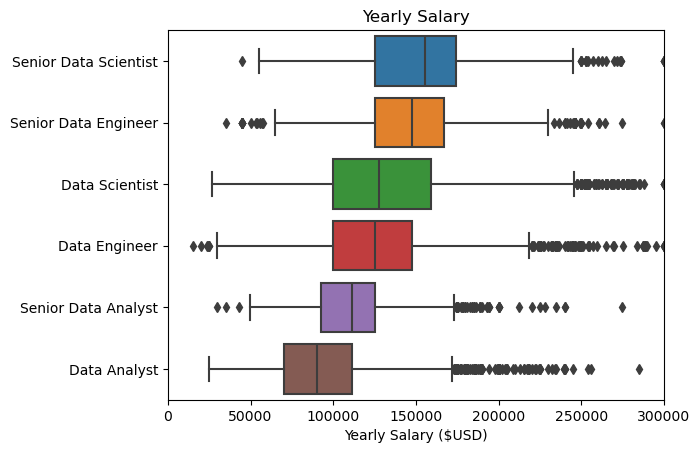

In [12]:
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.title('Yearly Salary')
ax = plt.gca()
plt.xlim(0,300000)
plt.show()

### Investigating Median Salary Vs Skills for Data Analysts

In [13]:
# Only get data analyst jobs
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA = df_DA.dropna(subset=['salary_year_avg'])

df_DA = df_DA.explode('job_skills')

df_DA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [28]:
df_DA_top_pay = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).iloc[1:11]

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0
vmware,1,147500.0


In [24]:
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


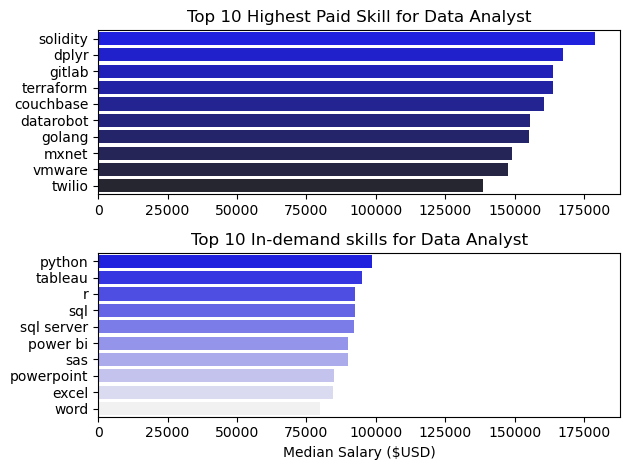

In [33]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DA_top_pay,x='median', y=df_DA_top_pay.index, ax=ax[0], palette='dark:b_r')
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skill for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:b_r')
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 In-demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()